In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
from Core2dsp.PLOT_Jiayu import plot
from NRSR_Tutorial.dsp import sine_wave

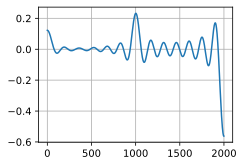

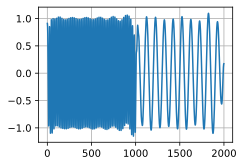

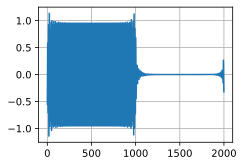

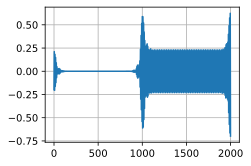

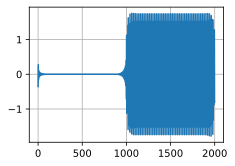

array([ 0.675,  5.95 , 12.575, 14.6  ])

In [10]:
def ewt(signal, N, show=False):
    ewt_res, mfb ,boundaries = ewtpy.EWT1D(signal, N = N, detect='locmax', reg = 'average', lengthFilter = 50, sigmaFilter = 5, completion=1)
    if show:
        for res_out in ewt_res.T:
            plot(res_out, show=True)
    return ewt_res, mfb ,boundaries

Fs = 100
t = np.linspace(0, 4, 400, endpoint=False)

x1 = sine_wave(sampling_rate=Fs, frequency=5) + sine_wave(sampling_rate=Fs,frequency=10)
x2 = sine_wave(sampling_rate=Fs, frequency=1) + sine_wave(sampling_rate=Fs, frequency=15) + sine_wave(sampling_rate=Fs, frequency=20)

x = np.concatenate([x1, x2])


ewt_res, mfb ,boundaries = ewt(x, N=5, show=True)

boundaries / np.pi * Fs / 2


100%|██████████| 1/1 [00:00<00:00, 200.12it/s]

hr: 57 rr: 30 sp: 112 dp: 71


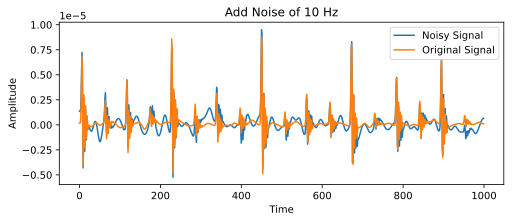

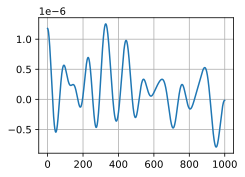

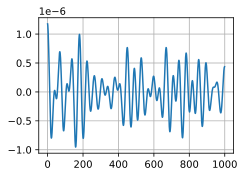

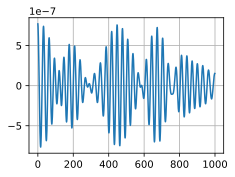

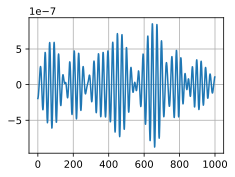

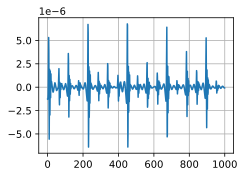

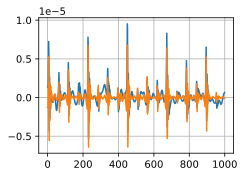

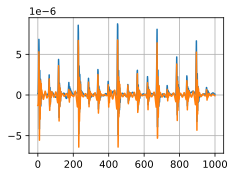

In [31]:
# 算是一种比较稳定的降噪手段

from NRSR_Tutorial.dsp import add_distort_noise, scg_simulate

scg_label = scg_simulate(n_echo = 0)
scg, label = scg_label[:1000], scg_label[-6:]

noisy_scg = add_distort_noise(scg, n_samples=1000, sampling_rate=100, noise_frequency=10,  noise_amplitude=0.5, show=True)

ewt_res, mfb ,boundaries = ewt(noisy_scg, N = 5, show=True)

plot([noisy_scg, ewt_res.T[-1]], show=True)
plot([scg, ewt_res.T[-1]], show=True)